# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)



In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



**Cell type : TextRead**

**Question 6: Coding Life in Lower Dimensions**

You are provided with a [dataset](https://drive.google.com/file/d/1wOp8K9BS8Ncmjz7aP8RdqukqkGNSwK4i/view?usp=drive_link) of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA.

**6a)** Code up and run the PCA algorithm on the given dataset. Plot the cumulative percentage variance explained by the principal components. Report the minimum number of principal components that contribute to at least 90% of the variance in the dataset.

**Note: Write the code from scratch for PCA. The only exception** is the computation of eigenvalues and eigenvectors for which you could use the numpy in-bulit function (specifically, do NOT use other functions like numpy.cov). If you have doubts about whether a particular library function can be used, please ask in Ed Discussion and we will clarify.

In [2]:
# Cell type : CodeWrite
# Write in this cell any helper/utility functions you may need for the perform_PCA function below.
# Some sample functions are given here as recommendations, however feel free to write your own.
import numpy as np
import matplotlib.pyplot as plt

# Helper functions
def compute_mean(Data):
    """Compute column-wise mean"""
    N, D = Data.shape
    mean = np.zeros(D)
    for j in range(D):
        sum_col = 0
        for i in range(N):
            sum_col += Data[i,j]
        mean[j] = sum_col / N
    return mean

def compute_cov(Data):
    """Compute covariance matrix with 1/N factor"""
    N = Data.shape[0]
    return (Data.T @ Data) / N

def mean_center(Data, mean):
    N, D = Data.shape
    X_centered = np.zeros((N,D))
    for i in range(N):
        for j in range(D):
            X_centered[i,j] = Data[i,j] - mean[j]
    return X_centered

def sortegs(eval, evecs):
    D = len(eval)
    for i in range(D):
        for j in range(i+1, D):
            if eval[j] > eval[i]:
                temp_val = eval[i]
                eval[i] = eval[j]
                eval[j] = temp_val
                temp_vec = evecs[:,i].copy()
                evecs[:,i] = evecs[:,j]
                evecs[:,j] = temp_vec
    return eval, evecs

def var(eval):
    total = 0
    for val in eval:
        total += val
    cvar = []
    running = 0
    for val in eval:
        running += val
        cvar.append(running / total)
    return cvar

def num_comps(cvar):
    for idx, val in enumerate(cvar):
        if val >= 0.9:
            return idx+1
    return len(cvar)


from google.colab import drive
drive.mount('/content/drive')
data_file = '/content/drive/MyDrive/PRML assignment 2/Data.npz'
with np.load(data_file) as data:
    key_name = list(data.keys())[0]
    X = data[key_name]

embedding_file = '/content/drive/MyDrive/PRML assignment 2/prml_asst_2_word_embeddings.txt'
words = []
embeddings = []

with open(embedding_file, 'r') as f:
    for line in f:
        parts = line.strip().split()
        words.append(parts[0])
        vec = np.array([float(x) for x in parts[1:]])
        embeddings.append(vec)

X_words = np.vstack(embeddings)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


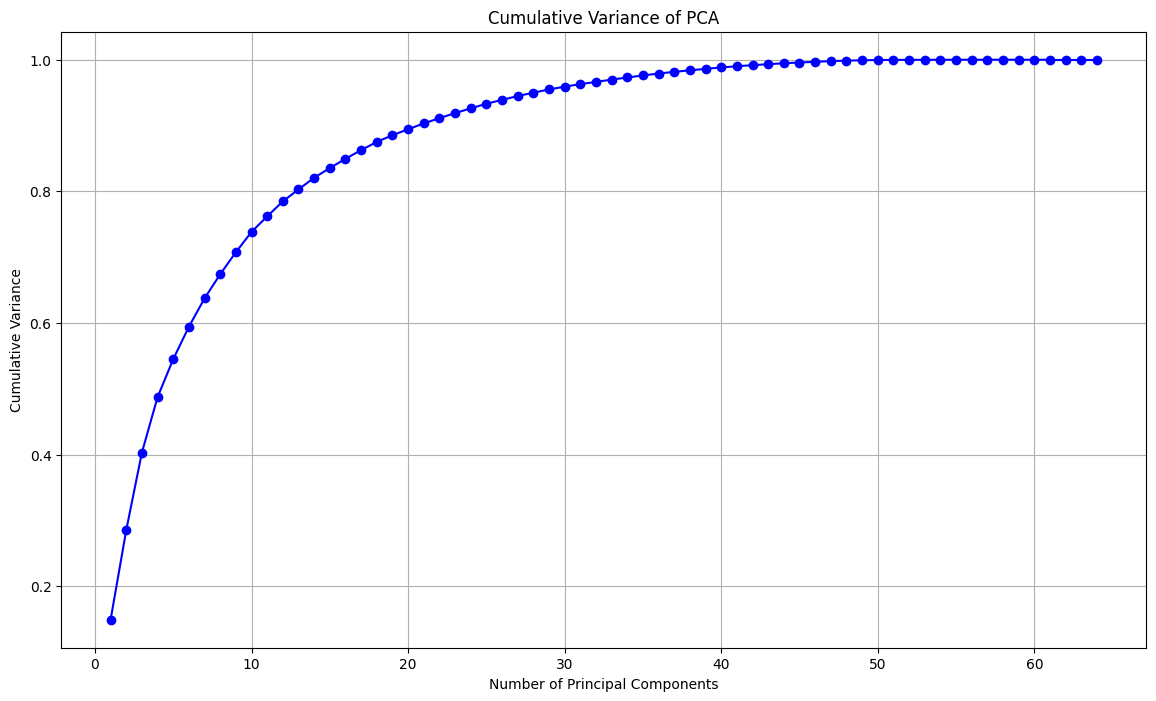

Minimum number of principal components for >=90% variance: 21
Variance captured by 2 PCs: 45.471470562132346


In [3]:
# Cell type : CodeWrite
# Write the function for PCA here.# Cell type : CodeWrite
def perform_PCA(Data, M=None):
    N, D = Data.shape

    mean = compute_mean(Data)
    X_centered = mean_center(Data, mean)

    cov_matrix = compute_cov(X_centered)

    eval, evecs = np.linalg.eigh(cov_matrix)
    eval, evecs = sortegs(eval, evecs)
    cvar = var(eval)


    if M is not None:
        top_evecs = evecs[:,:M]
        N, D = X_centered.shape
        Data_reduced = np.zeros((N,M))
        for i in range(N):
            for j in range(M):
                s = 0
                for k in range(D):
                    s += X_centered[i,k]*top_evecs[k,j]
                Data_reduced[i,j] = s
    else:
        top_evecs = evecs
        Data_reduced = np.zeros((N,D))
        for i in range(N):
            for j in range(D):
                s = 0
                for k in range(D):
                    s += X_centered[i,k]*top_evecs[k,j]
                Data_reduced[i,j] = s

    return Data_reduced, top_evecs, eval, mean


def plot_var(eval):
    cvar = var(eval)
    plt.figure(figsize=(14,8))
    for i, val in enumerate(cvar):
        plt.plot(i+1, val, 'bo')
    for i in range(len(cvar)-1):
        plt.plot([i+1, i+2], [cvar[i], cvar[i+1]], 'b-')
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Variance")
    plt.title("Cumulative Variance of PCA")
    plt.grid(True)
    plt.show()

    return num_comps(cvar)


    #varplot
Data_reduced_img, topPCs_img, eval_img, mean_img = perform_PCA(X)
num_comp = plot_var(eval_img)
print("Minimum number of principal components for >=90% variance:", num_comp)

Data_red_words, topPCs_words, eval_words, mean_words = perform_PCA(X_words, M=2)
total_var = 0
for val in eval_words:
    total_var += val
perc_var = (eval_words[0]+eval_words[1])/total_var*100
print("Variance captured by 2 PCs:", perc_var)




**Cell type : TextRead**

**6b)**  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions $M \in \{2,4,8,16\}$. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.

In [4]:
# Cell type : CodeWrite
# Write the code for data reconstruction, and run the algorithm for selecting the number of dimensions.
# PCA on Images
def reconstruct_data(Data_reduced, top_evecs, mean):
    N, M = Data_reduced.shape
    D = top_evecs.shape[0]
    X_reconstructed = np.zeros((N,D))
    for i in range(N):
        for j in range(D):
            s = 0
            for k in range(M):
                s += Data_reduced[i,k] * top_evecs[j,k]
            X_reconstructed[i,j] = s + mean[j]
    return X_reconstructed


#mse
Ms = [2, 4, 8, 16]
res = []

for M in Ms:
    Data_reduced, topPCs, eval, mean = perform_PCA(X, M)

    X_reconstructed = reconstruct_data(Data_reduced, topPCs, mean)
    N, D = X.shape
    mse = 0
    for i in range(N):
        for j in range(D):
            mse += (X[i,j] - X_reconstructed[i,j])**2
    mse /= N

    res.append((M, mse))
    print(f"M={M}, MSE={mse:.6f}")

M=2, MSE=858.944781
M=4, MSE=616.191130
M=8, MSE=391.794736
M=16, MSE=180.939703



**Cell type : TextRead**

**6c)** Let's now apply the same PCA code that you've written above to analyze images to understand text. Large language models (LLMs) typically analyze text by representing words as vectors, also known as embeddings. You are provided with 768-dimensional embeddings (extracted from a LLM called BERT) of 10 words in the [folder](https://drive.google.com/drive/folders/1yshmnkWoALf2ZwqgZqWwXJk2W5_XuCLG?usp=sharing).

Apply your PCA code with $M=2$ PCs on these embeddings to visualize the 10 words in 2-D. Report how much percentage of variation is captured by these two PCs. What does this (2D scatterplot) visualization tell you about the embeddings of related vs. unrelated words?

(Note: If applying the same PCA code to this embeddings data matrix $X$ takes a long time, then consider applying it to $X^T$ and use the returned PCs to derive the PCs of $X$ as in question Q3 of the Assignment.)

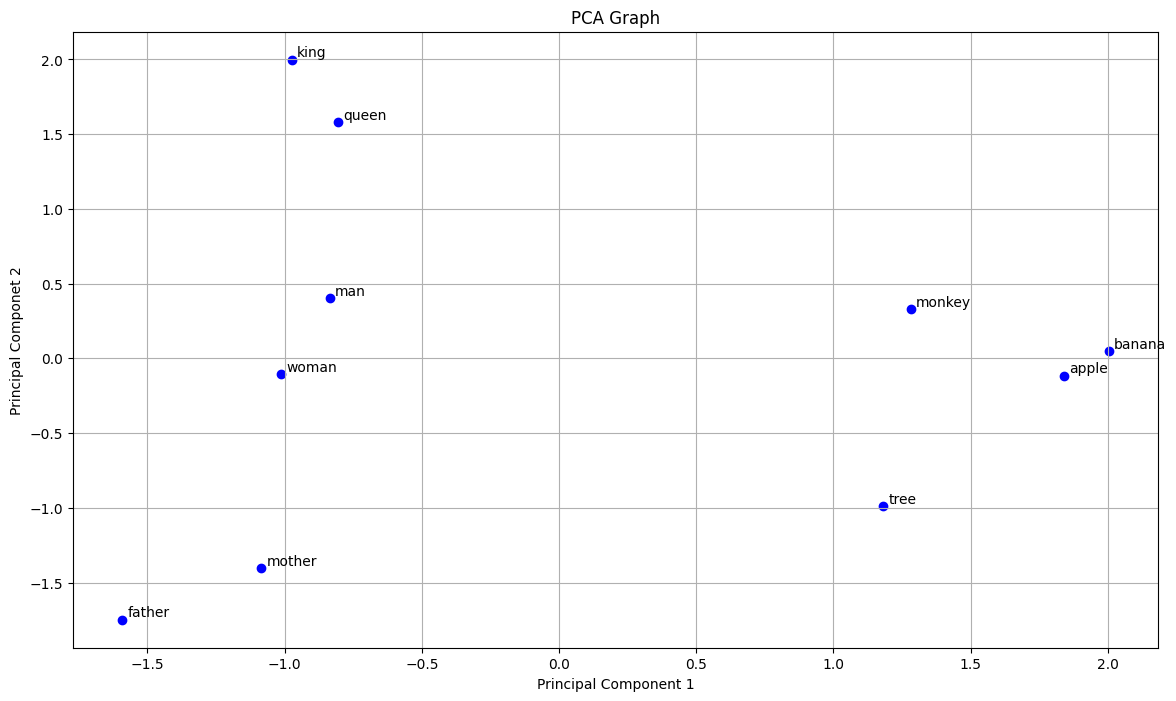

In [5]:
# Cell type : CodeWrite
# Write your code here as instructed.
# (Use the function(s) written previously)

#words plot
plt.figure(figsize=(14,8))
for i in range(Data_red_words.shape[0]):
    x, y = Data_red_words[i]
    plt.scatter(x,y, color= 'blue')
    plt.text(x+0.02, y+0.02, words[i], fontsize = 10)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Componet 2")
plt.title("PCA Graph")
plt.grid(True)
plt.show()
